In [2]:
#%matplotlib inline

The rate equation for the quasiparticle density nis
\begin{equation}
\dot{n} = \gamma_\mathrm{G} -R n^2 - D n,
\end{equation}
where $\gamma_\mathrm{G}$ is the generation rate per unit volume, $R$ is the effective recombination constant, and $D$ is the single-particle decay constant.

For a perturbation $\delta n$ around the steady state number $\bar{n}$,
\begin{equation}
\dot{\delta }  = -R \delta n^2 - \tau_{qp}^{-1} \delta ,
\end{equation}
where
$\tau_{qp}^{-1} = 2 R \bar{n} + D$
is the inverse quasiparticle relaxation time. With initial condition $\delta n(0)$ given, the solution is
\begin{equation}
\delta n(t)
  =
  \frac{\delta n(0)}{(1 + d_0) \exp (t / \tau_\mathrm{qp}) - d_0},
\end{equation}
where
\begin{equation}
d_0
  =
  \frac{\delta n(0)}{2 \bar{n} + D / R}
  =
  \frac{R \delta n(0)}{\tau_{qp}}.
\end{equation}

In [3]:
from scipy.constants import e, k as k_B

In [4]:
tau_0 = 438e-9
N0_per_um3_per_eV = 1.74e10
T_c = 1.2
BCS = 1.76
Delta_eV = BCS * k_B * T_c / e
1e6 * Delta_eV

181.99801672202756

In [5]:
R_Al_um3_per_s = (2 * BCS)**3 * (4 * N0_per_um3_per_eV * Delta_eV * tau_0)**-1
R_Al_um3_per_s

7.86100341466308

In [24]:
phonon_trapping = 2
R_eff_Al_um3_per_s = R_Al_um3_per_s / phonon_trapping

In [48]:
def delta_n(t, delta_n0, n, R=R_eff_Al_um3_per_s, D=0):
    tau_qp = 1 / (2 * n * R + D)
    d_0 = R * delta_n0 * tau_qp
    return (delta_n0 /
            ((1 + d_0) * np.exp(t / tau_qp) - d_0))

tau_qp = 127 us


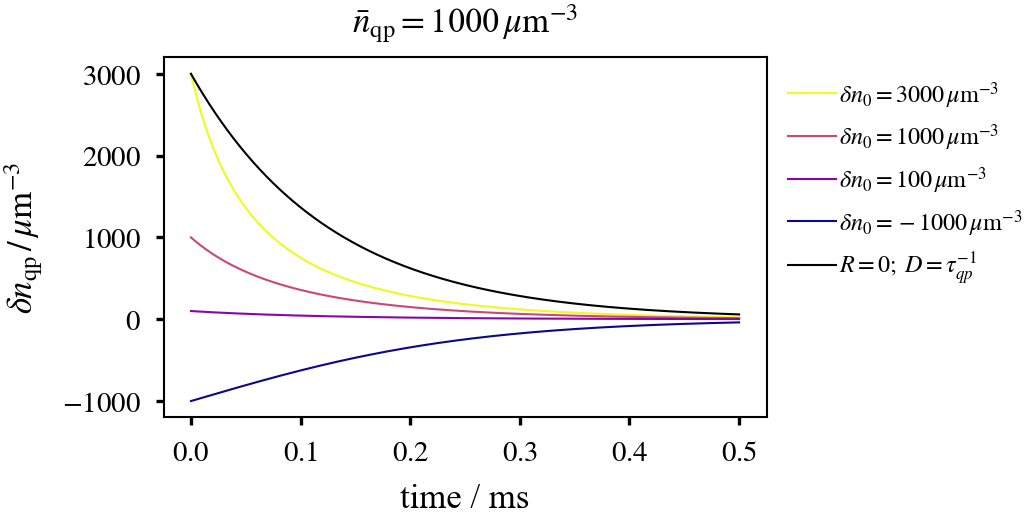

In [53]:
t_scale = 1e3
t = np.linspace(0, 0.0005, 10000)
n_per_um3 = 1000
D = 0
delta_n0s = n_per_um3 * np.array([3, 1, 0.1, -1])
mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=min(delta_n0s), vmax=max(delta_n0s)),
                                 cmap=plt.cm.plasma)
tau_qp = 1 / (2 * n_per_um3 * R_eff_Al_um3_per_s + D)
print("tau_qp = {:.0f} us".format(1e6 * tau_qp))
fig, ax = plt.subplots()
ax.set_title(r'$\bar{n}_\mathrm{qp} =$' + '{:.0f}'.format(n_per_um3) + r'$\, \mu \mathrm{m}^{-3}$')
ax.set_xlabel('time / ms')
ax.set_ylabel(r'$\delta n_\mathrm{qp} \, / \, \mu \mathrm{m}^{-3}$')
for delta_n0 in delta_n0s:
    ax.plot(t_scale * t, delta_n(t=t, delta_n0=delta_n0, n=n_per_um3, R=R_eff_Al_um3_per_s, D=D),
            label=r"$\delta n_0 = {:.0f} \, \mu \mathrm{{m}}^{{-3}}$".format(delta_n0),
            color=mappable.to_rgba(delta_n0))
ax.plot(t_scale * t, delta_n(t=t, delta_n0=max(delta_n0s), n=n_per_um3, R=0, D=1 / tau_qp),
        label=r'$R = 0; \; D = \tau_{qp}^{-1}$',
        color='black')
ax.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1, 1))

tau_qp = 127 us


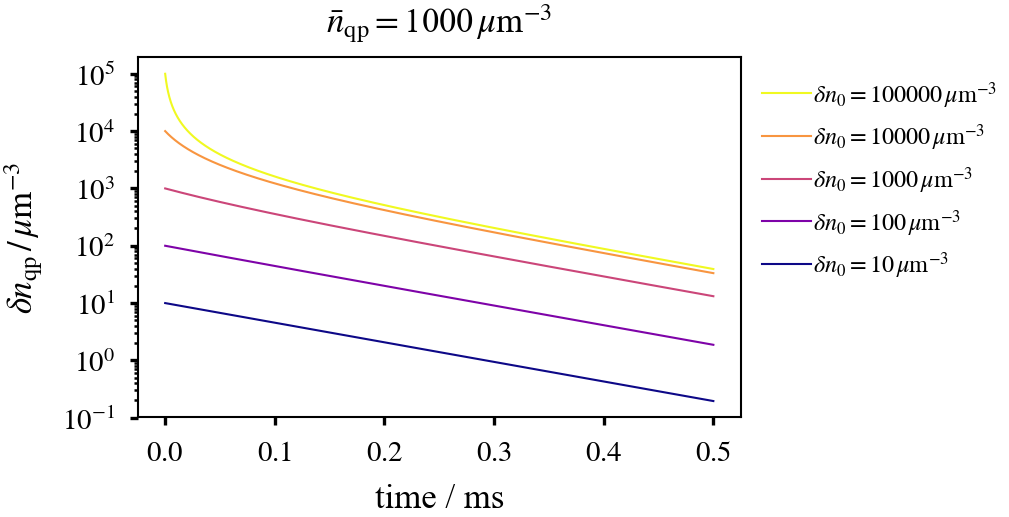

In [55]:
t_scale = 1e3
t = np.linspace(0, 0.0005, 10000)
n_per_um3 = 1000
D = 0
delta_n0s = n_per_um3 * np.array([100, 10, 1, 0.1, 0.01])
mappable = plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=min(delta_n0s), vmax=max(delta_n0s)),
                                 cmap=plt.cm.plasma)
tau_qp = 1 / (2 * n_per_um3 * R_eff_Al_um3_per_s + D)
print("tau_qp = {:.0f} us".format(1e6 * tau_qp))
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_title(r'$\bar{n}_\mathrm{qp} =$' + '{:.0f}'.format(n_per_um3) + r'$\, \mu \mathrm{m}^{-3}$')
ax.set_xlabel('time / ms')
ax.set_ylabel(r'$\delta n_\mathrm{qp} \, / \, \mu \mathrm{m}^{-3}$')
for delta_n0 in delta_n0s:
    ax.plot(t_scale * t, delta_n(t=t, delta_n0=delta_n0, n=n_per_um3),
            label=r"$\delta n_0 = {:.0f} \, \mu \mathrm{{m}}^{{-3}}$".format(delta_n0),
            color=mappable.to_rgba(delta_n0))
ax.legend(fontsize='xx-small', loc='upper left', bbox_to_anchor=(1, 1))